In [2]:
import matplotlib.pyplot as plt
import torch

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

In [19]:
results_spdup = torch.load("results_speed_up.pt")
results_spdup

/tmp/ipykernel_7561/2682822955.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results_spdup = torch.load("results_speed_up.pt")


{'resnet18': {96: (89.48, 12.0),
  32: (89.48, 11.799999999999999),
  16: (89.48, 11.4),
  8: (89.48, 10.2),
  4: (89.48, 7.3),
  2: (89.48, 6.4),
  1: (89.48, 6.0)},
 'vgg8': {96: (85.57, 11.1),
  32: (85.57, 10.299999999999999),
  16: (85.57, 9.8),
  8: (85.57, 9.0),
  4: (85.57, 6.800000000000001),
  2: (85.57, 6.0),
  1: (85.57, 5.5)},
 'densenet40': {96: (36.21, 119.30000000000001),
  32: (36.21, 85.9),
  16: (36.21, 38.2),
  8: (36.21, 14.299999999999999),
  4: (36.21, 8.4),
  2: (36.21, 6.9),
  1: (36.21, 6.5)}}

In [20]:
results_topk = torch.load("results_topk.pt")
results_topk

/tmp/ipykernel_7561/1681264573.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results_topk = torch.load("results_topk.pt")


{'densenet40': {0.01: (18.84, 6.4136),
  0.05: (22.45, 6.4634),
  0.1: (32.99, 6.525499999999999),
  0.2: (45.45, 6.6497),
  0.3: (51.79, 6.773999999999999),
  0.4: (54.91, 6.8982),
  0.5: (56.85, 7.0226),
  0.6: (57.84, 7.1381),
  0.7: (57.72, 7.1478),
  0.8: (57.77, 7.148000000000001),
  0.9: (57.77, 7.148000000000001)},
 'resnet18': {0.01: (78.22, 5.6999),
  0.05: (87.22, 5.815),
  0.1: (88.97, 5.9581),
  0.2: (89.88, 6.1205),
  0.3: (89.78, 6.1039),
  0.4: (89.77, 6.1622),
  0.5: (89.73, 6.2184),
  0.6: (89.74, 6.2305),
  0.7: (89.74, 6.2305),
  0.8: (89.74, 6.2305),
  0.9: (89.74, 6.2305)},
 'vgg8': {0.01: (82.61, 5.2956),
  0.05: (84.5, 5.4018999999999995),
  0.1: (85.27, 5.5348),
  0.2: (85.55, 5.6784),
  0.3: (85.64, 5.6784),
  0.4: (85.84, 5.7487),
  0.5: (85.88, 5.82),
  0.6: (85.82, 5.7592),
  0.7: (85.82, 5.7598),
  0.8: (85.79, 5.7602),
  0.9: (85.79, 5.7602)}}

/tmp/ipykernel_7561/2112836922.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tile_fraction = torch.load("topk_tile_dict.pt")


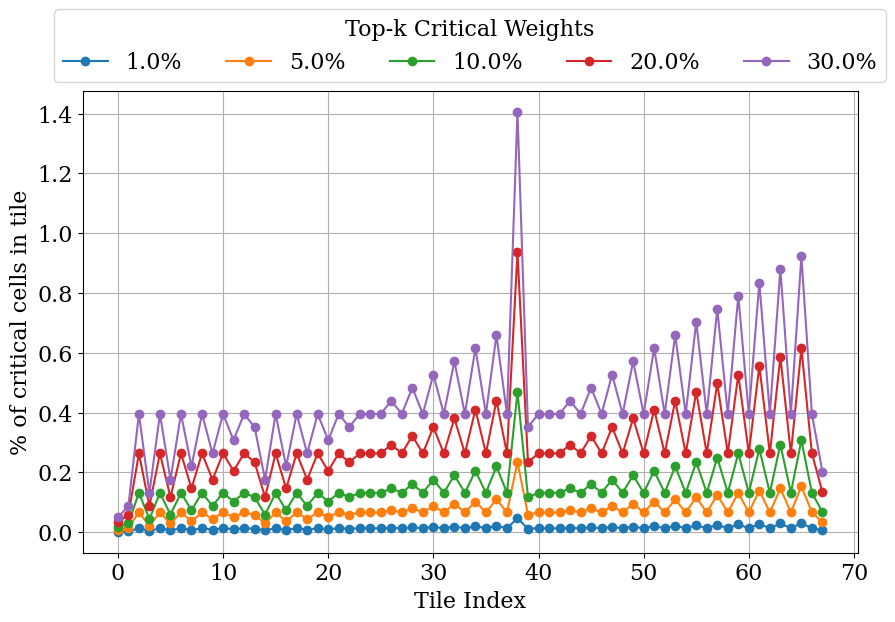

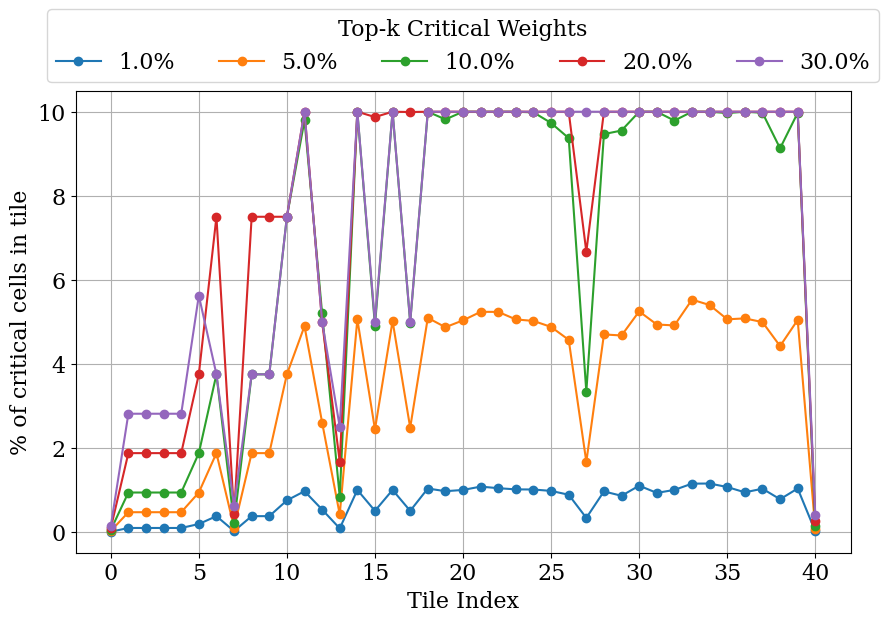

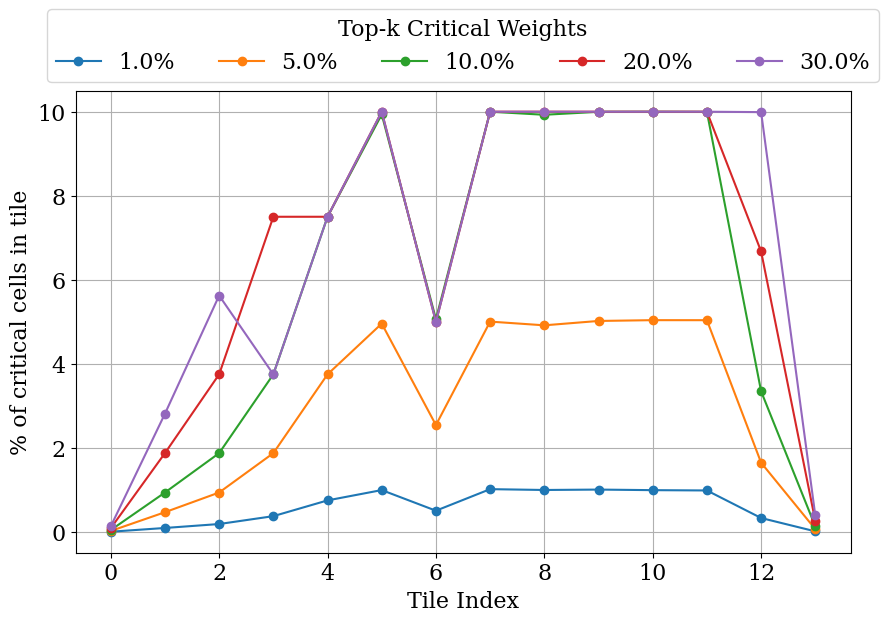

In [18]:
import matplotlib.pyplot as plt
tile_fraction = torch.load("topk_tile_dict.pt")
# Example data structure
data = {
    'densenet40': {0.01: [1, 2, 3], 
                   0.05: [4, 5, 6],
                   0.1: [7, 8, 9]},
    'resnet18': {0.01: [2, 3, 4], 
                 0.05: [5, 6, 7],
                 0.1: [8, 9, 10]},
    'vgg8': {0.01: [3, 4, 5], 
             0.05: [6, 7, 8],
             0.1: [9, 10, 11]}
}

def plot_data(data, threshold=0.1):
    for model, thresholds in data.items():
        plt.figure(figsize=(10, 6))
        # max_length = 0  # Variable to track the maximum list length for setting x-ticks
        for key, values in thresholds.items():
            if key <= threshold:
                scaled_values = [x * 100 for x in values]  # Scale each value by a factor of 100
                plt.plot(scaled_values, label=f'{key * 100}%', marker='o')
                # max_length = max(max_length, len(values))  # Update max length if current list is longer
        # plt.title(f'Value Plots for {model} with Threshold <= {threshold}')
        plt.xlabel('Tile Index')
        plt.ylabel('% of critical cells in tile')
        # plt.xticks(range(max_length))  # Set x-ticks based on the maximum length of the lists
        # plt.legend(title='Top-k Critical Weights')
        plt.legend(title='Top-k Critical Weights', loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=len(thresholds))
        plt.grid(True)
        plt.savefig(f"scale_{model}_topk.png",dpi=300)
        plt.show()

plot_data(tile_fraction, threshold=0.3)

# plot_data(data, threshold=0.05)
